### 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#결측치
df_null=df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [7]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [12]:
df_null.mean()*100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

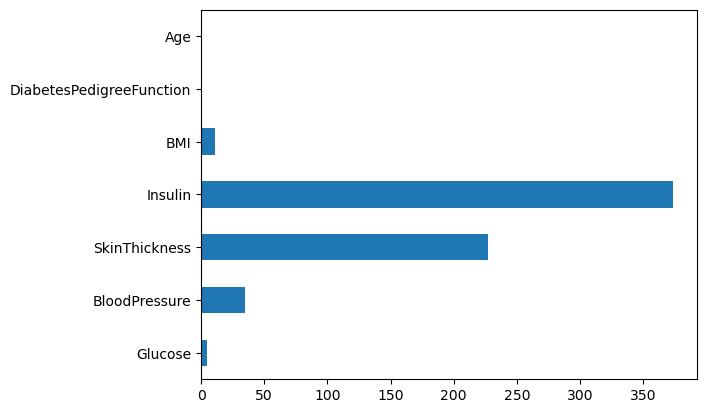

In [13]:
df_null.sum().plot.barh()

<Axes: >

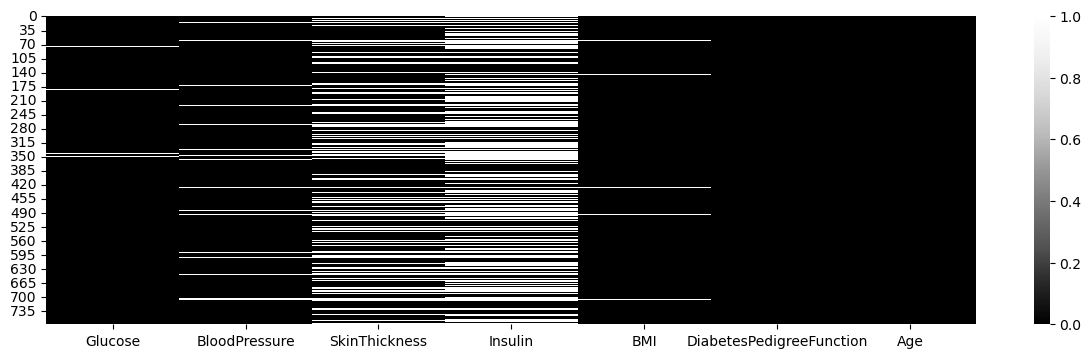

In [14]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap="Greys_r")

In [16]:
 df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
df["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [26]:
#"Pregnancies"를 groupby로 그룹화해서 Outcome에 대한 비율을 구함
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

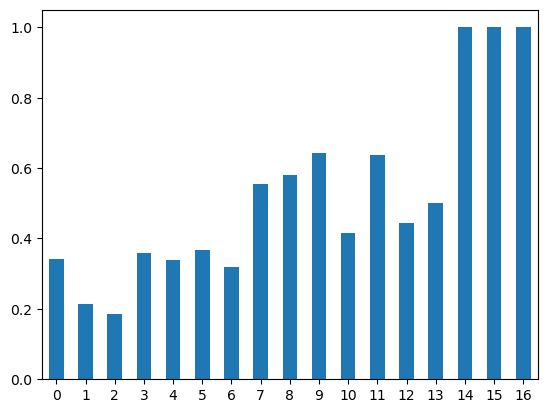

In [31]:
df_po["mean"].plot.bar(rot=0)

<Axes: xlabel='Outcome', ylabel='count'>

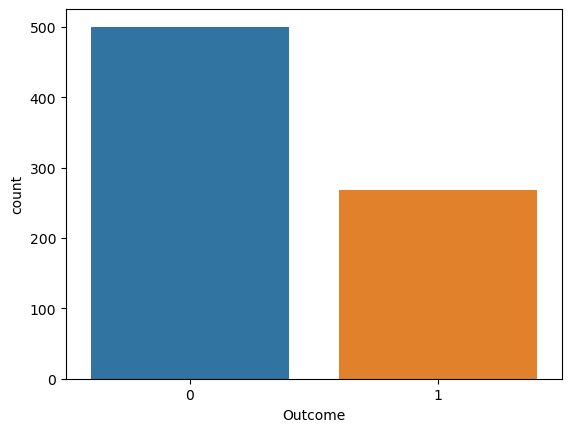

In [32]:
sns.countplot(data=df, x="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

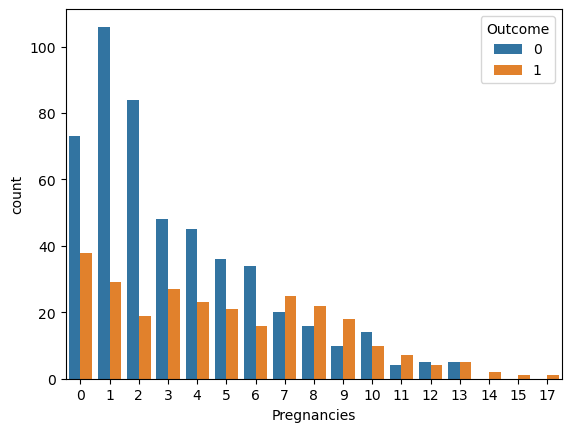

In [34]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [35]:
df["Pregnancies_high"]=df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

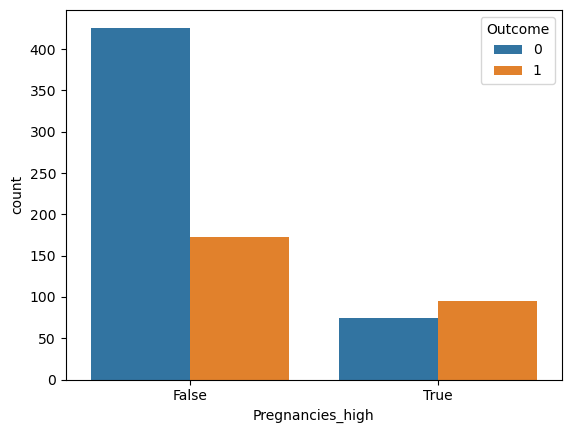

In [36]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

<Axes: xlabel='Outcome', ylabel='BMI'>

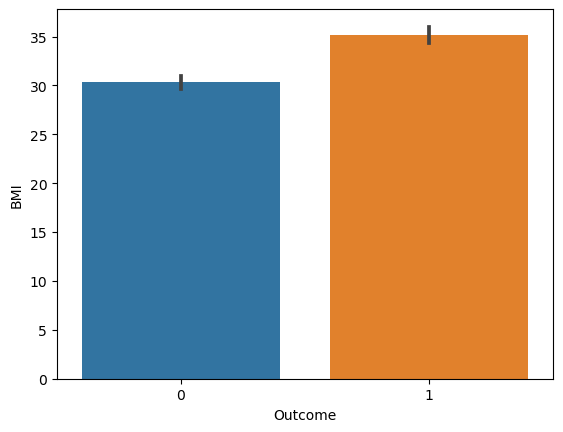

In [37]:
sns.barplot(data=df, x="Outcome", y="BMI")

<Axes: xlabel='Outcome', ylabel='Glucose'>

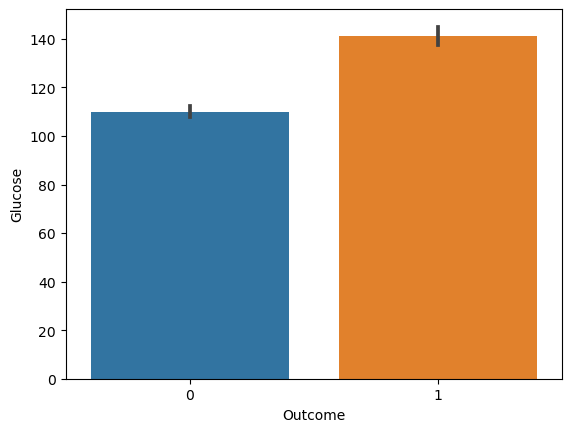

In [38]:
sns.barplot(data=df, x="Outcome", y="Glucose")

<Axes: xlabel='Outcome', ylabel='Insulin'>

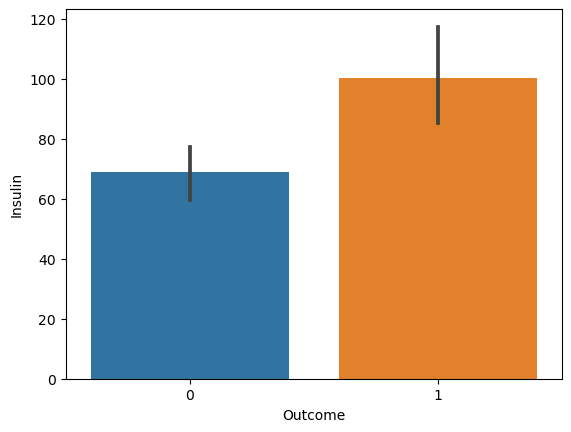

In [40]:
sns.barplot(data=df, x="Outcome", y="Insulin")
#데이터의 95퍼센트 신뢰구간: 검정 막대

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

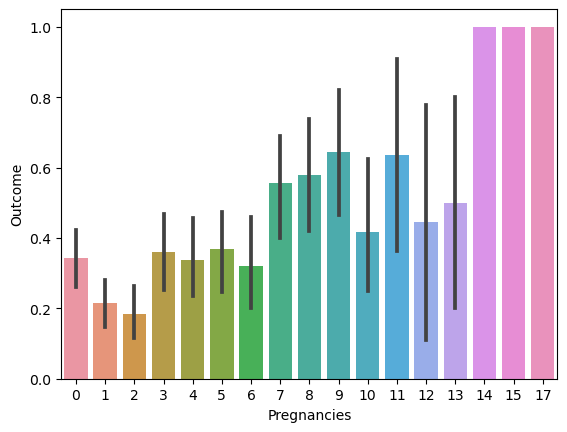

In [41]:
sns.barplot(data=df, x="Pregnancies", y="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

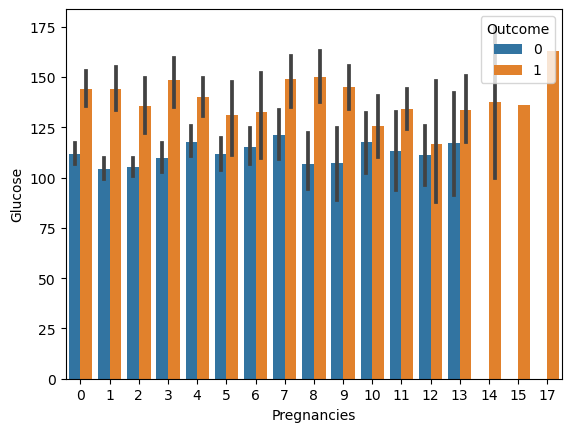

In [44]:
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='BMI'>

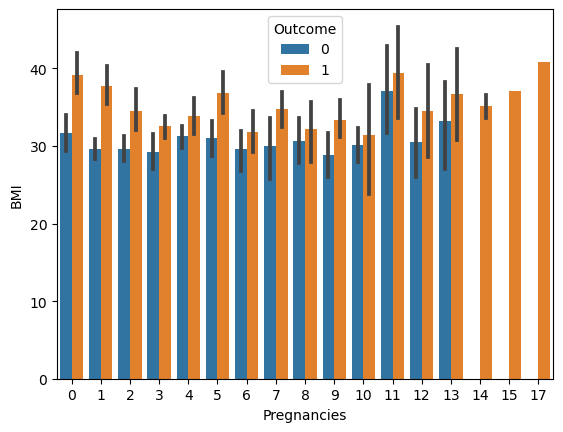

In [45]:
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

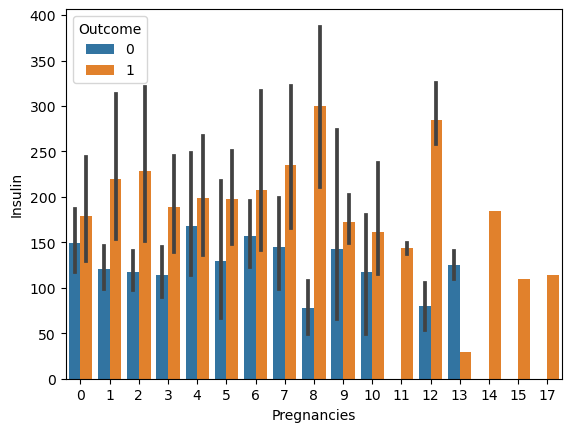

In [50]:
sns.barplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

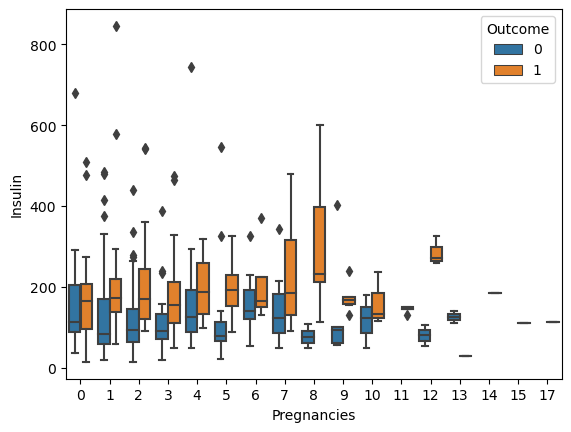

In [49]:
sns.boxplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

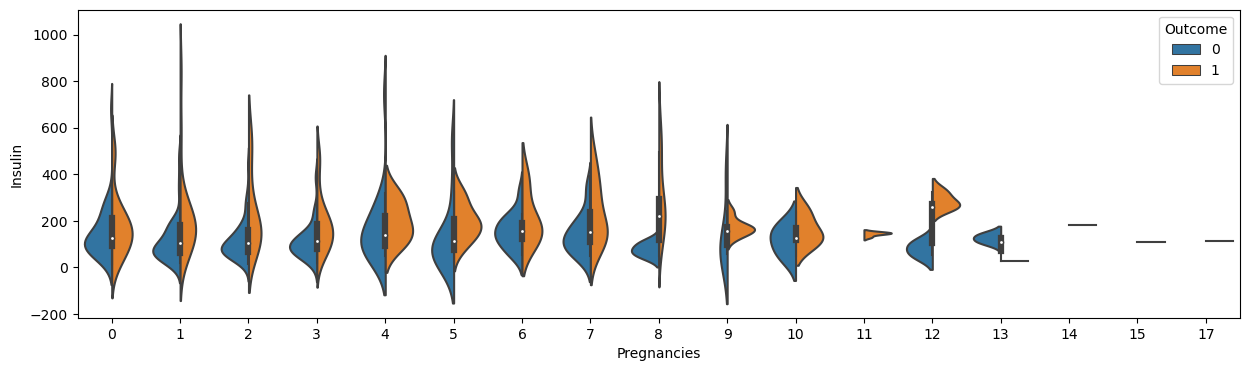

In [54]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

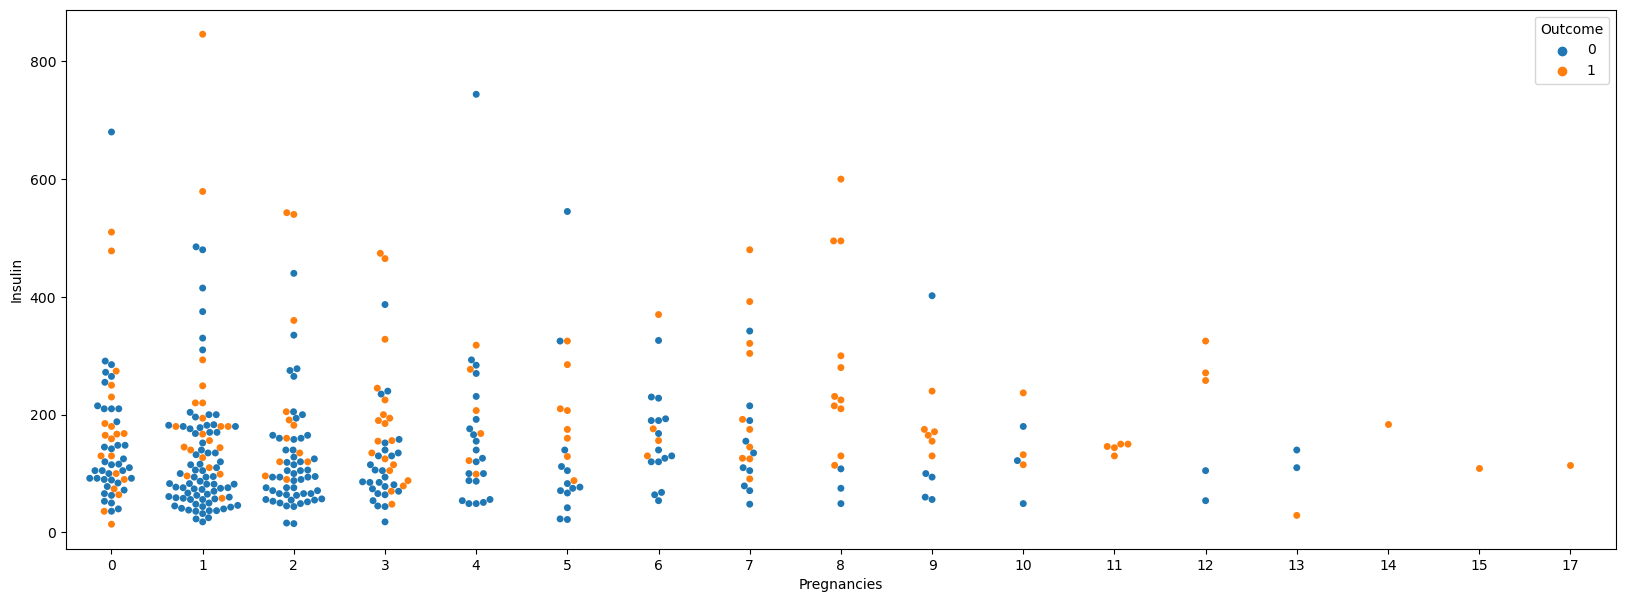

In [64]:
plt.figure(figsize=(20,7))
sns.swarmplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

In [73]:
df_0 = df[df["Outcome"]==0]
df_1 = df[df["Outcome"]==1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/2685521112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Pregnancies"])
/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/2685521112.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pregnancies"]

<Axes: xlabel='Pregnancies', ylabel='Density'>

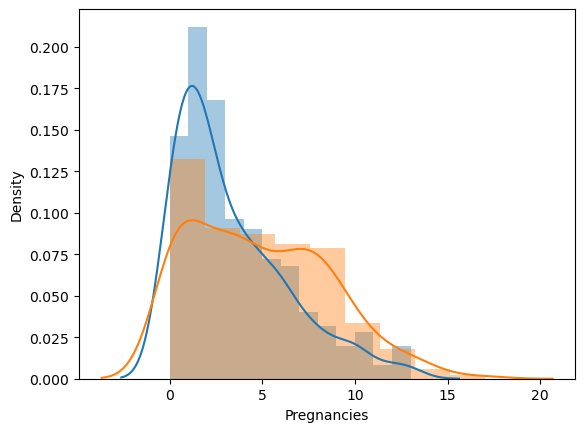

In [76]:
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/2520006151.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Age"], rug=True, label=0)
/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/2520006151.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Ag

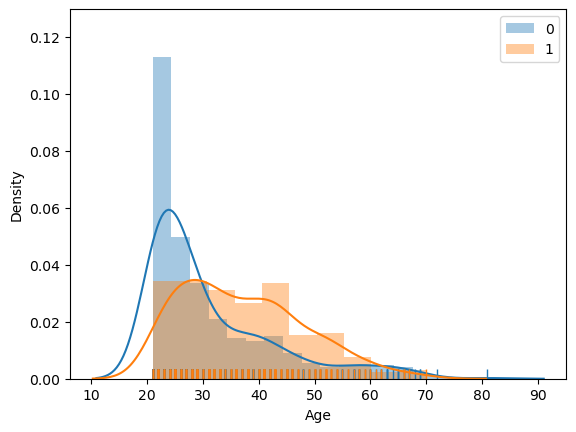

In [150]:
sns.distplot(df_0["Age"], rug=True, label=0)
sns.distplot(df_1["Age"], rug=True, label=1)
#sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
#sns.distplot(df_1["Age"], hist=False, rug=True, label=1)
plt.legend()

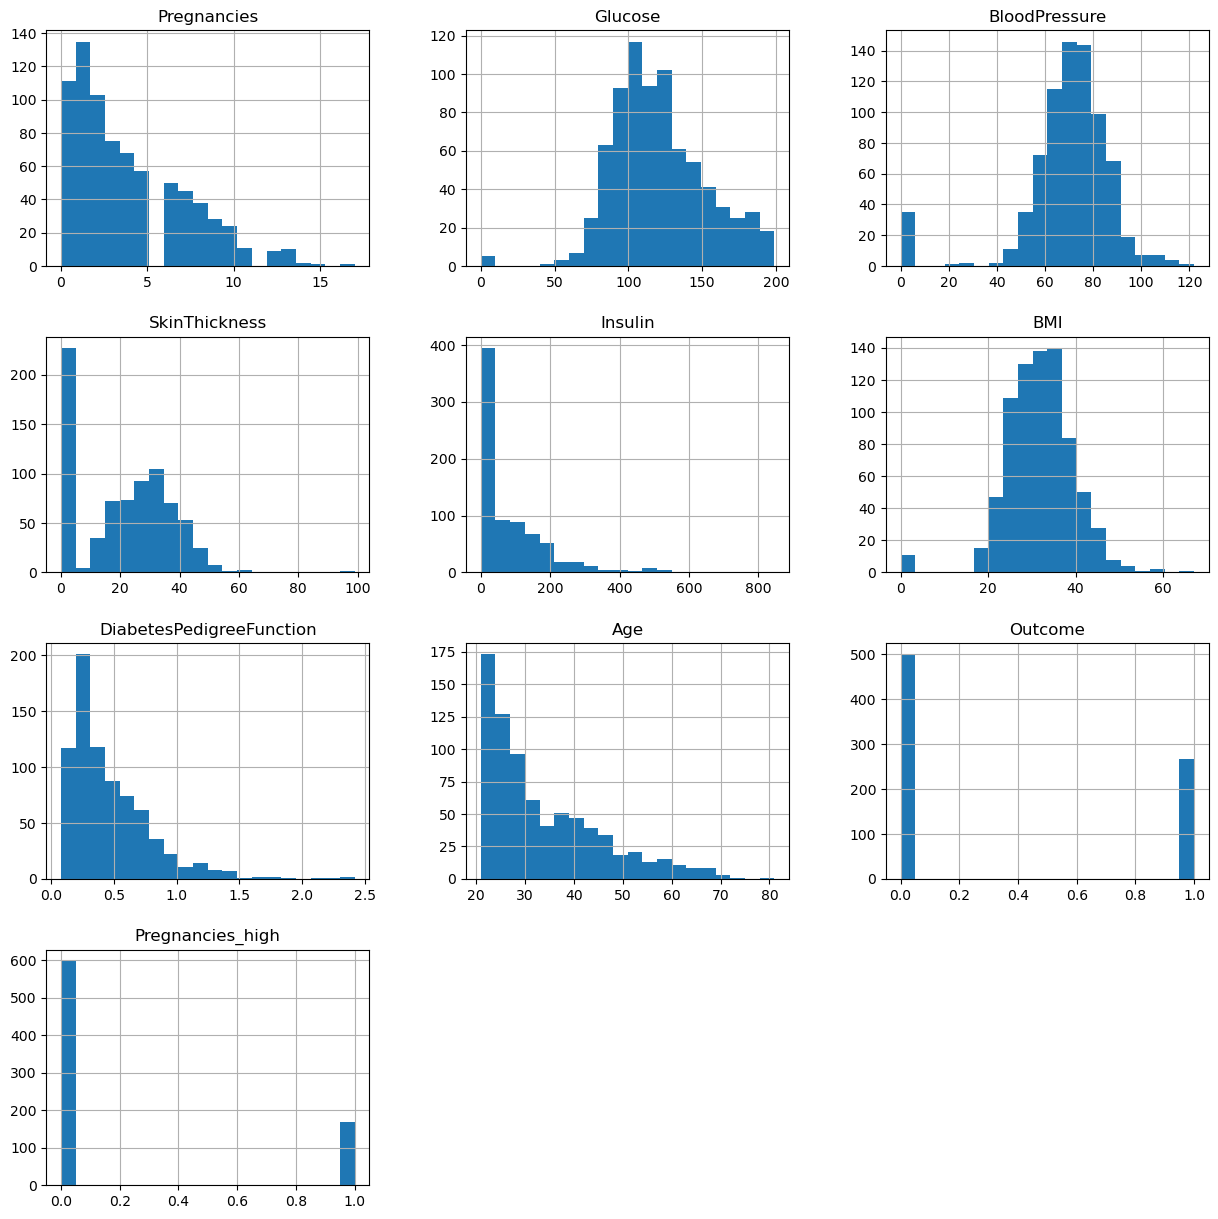

In [98]:
df["Pregnancies_high"]=df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15,15), bins=20)

In [114]:
cols=df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0
1 Glucose 0
2 BloodPressure 0
3 SkinThickness 1
4 Insulin 1


/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/3632017953.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/3632017953.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_

5 BMI 1
6 DiabetesPedigreeFunction 2
7 Age 2


/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/3632017953.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/3632017953.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_

8 Outcome 2


/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/3632017953.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])


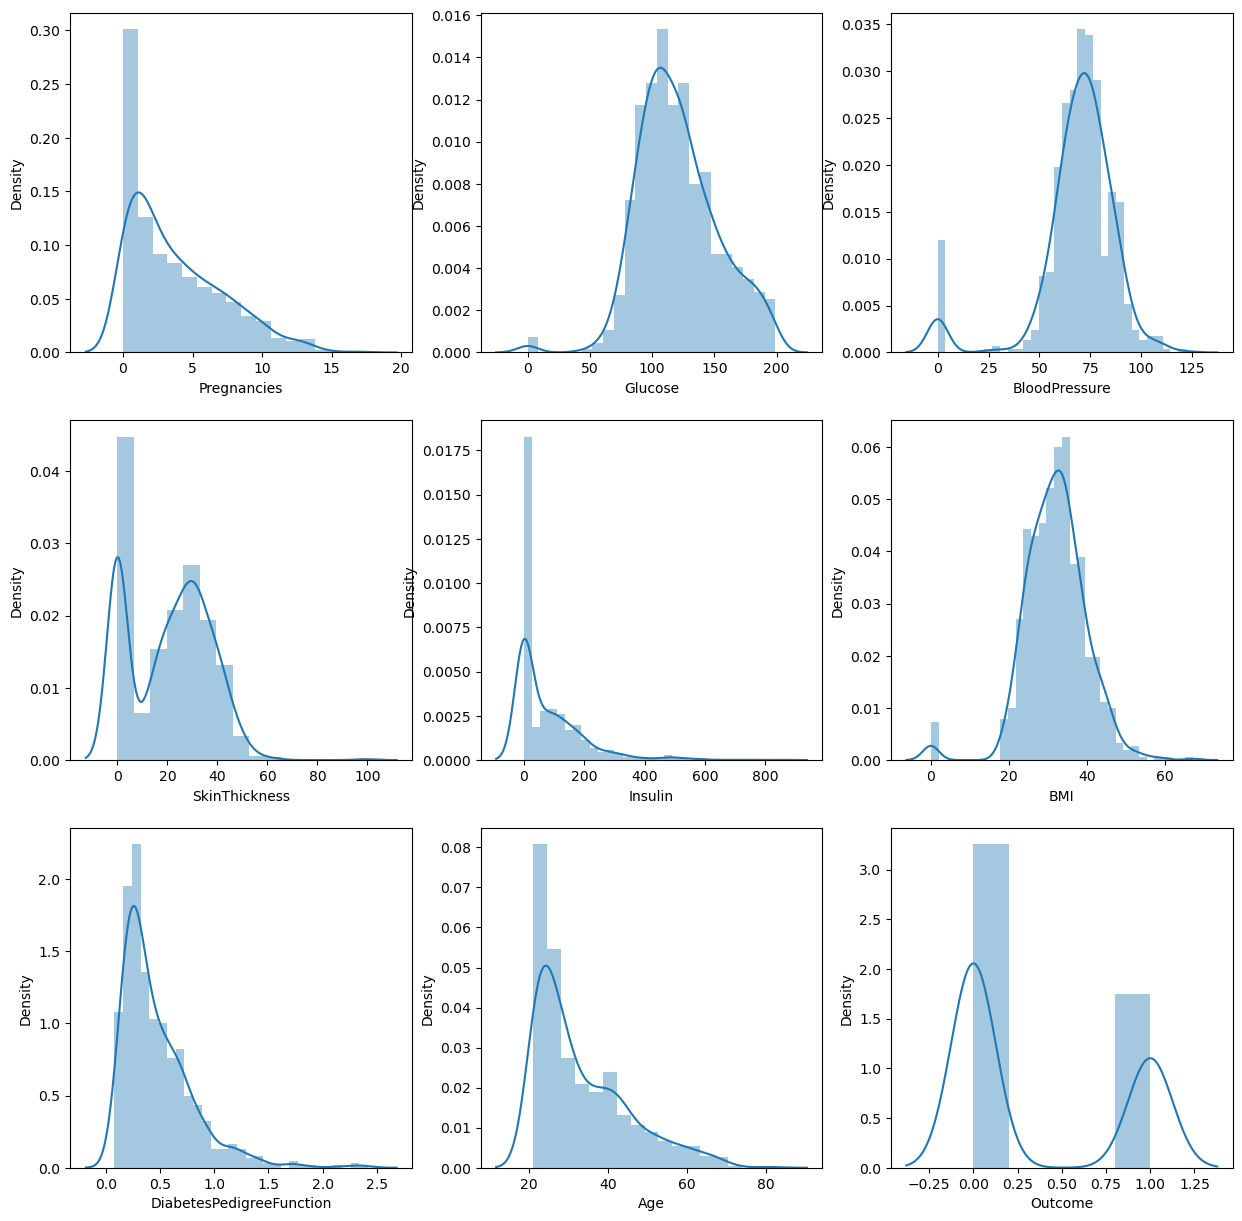

In [117]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i, col_name in enumerate(cols):
    row = i//3
    col = i%3
    print(i, col_name, row)
    sns.distplot(df[col_name], ax=axes[row][col])

0 Pregnancies 0
1 Glucose 0
2 BloodPressure 1
3 SkinThickness 1
4 Insulin 2


/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/3999255924.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/3999255924.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[

5 BMI 2
6 DiabetesPedigreeFunction 3
7 Age 3


/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/3999255924.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
/var/folders/_w/673x5hrs7y738svxr254tjtw0000gn/T/ipykernel_12871/3999255924.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[

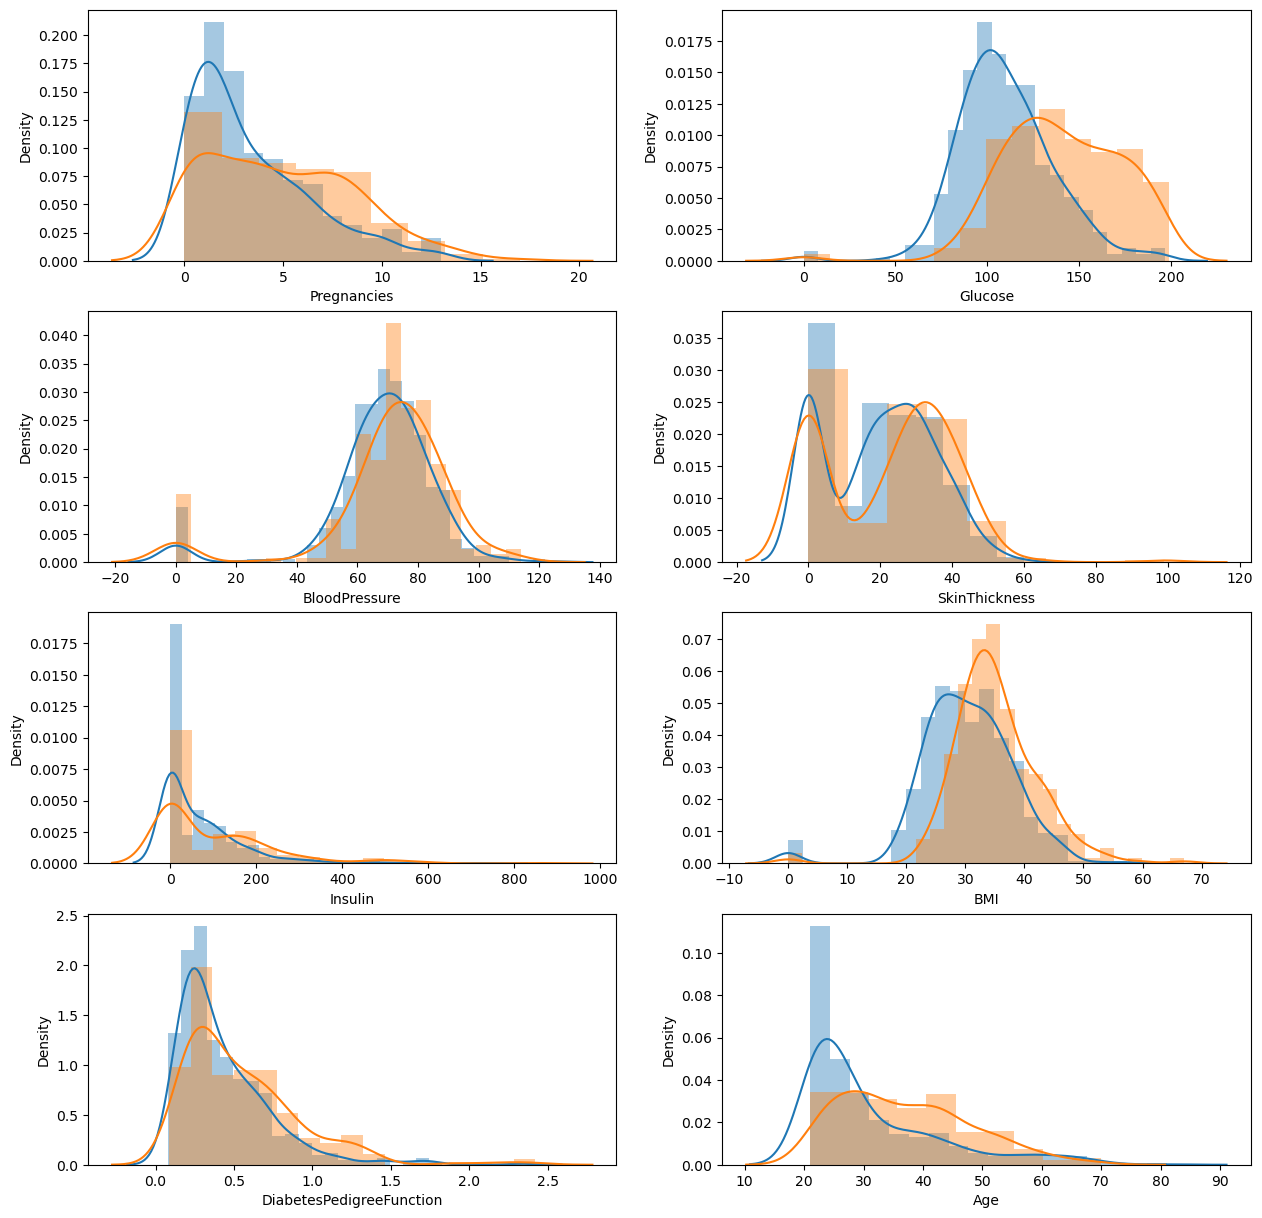

In [122]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for i, col_name in enumerate(cols[:-1]):
    row = i//2
    col = i%2
    print(i, col_name, row)
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])


0 Pregnancies 0
1 Glucose 0
2 BloodPressure 1
3 SkinThickness 1
4 Insulin 2
5 BMI 2
6 DiabetesPedigreeFunction 3
7 Age 3


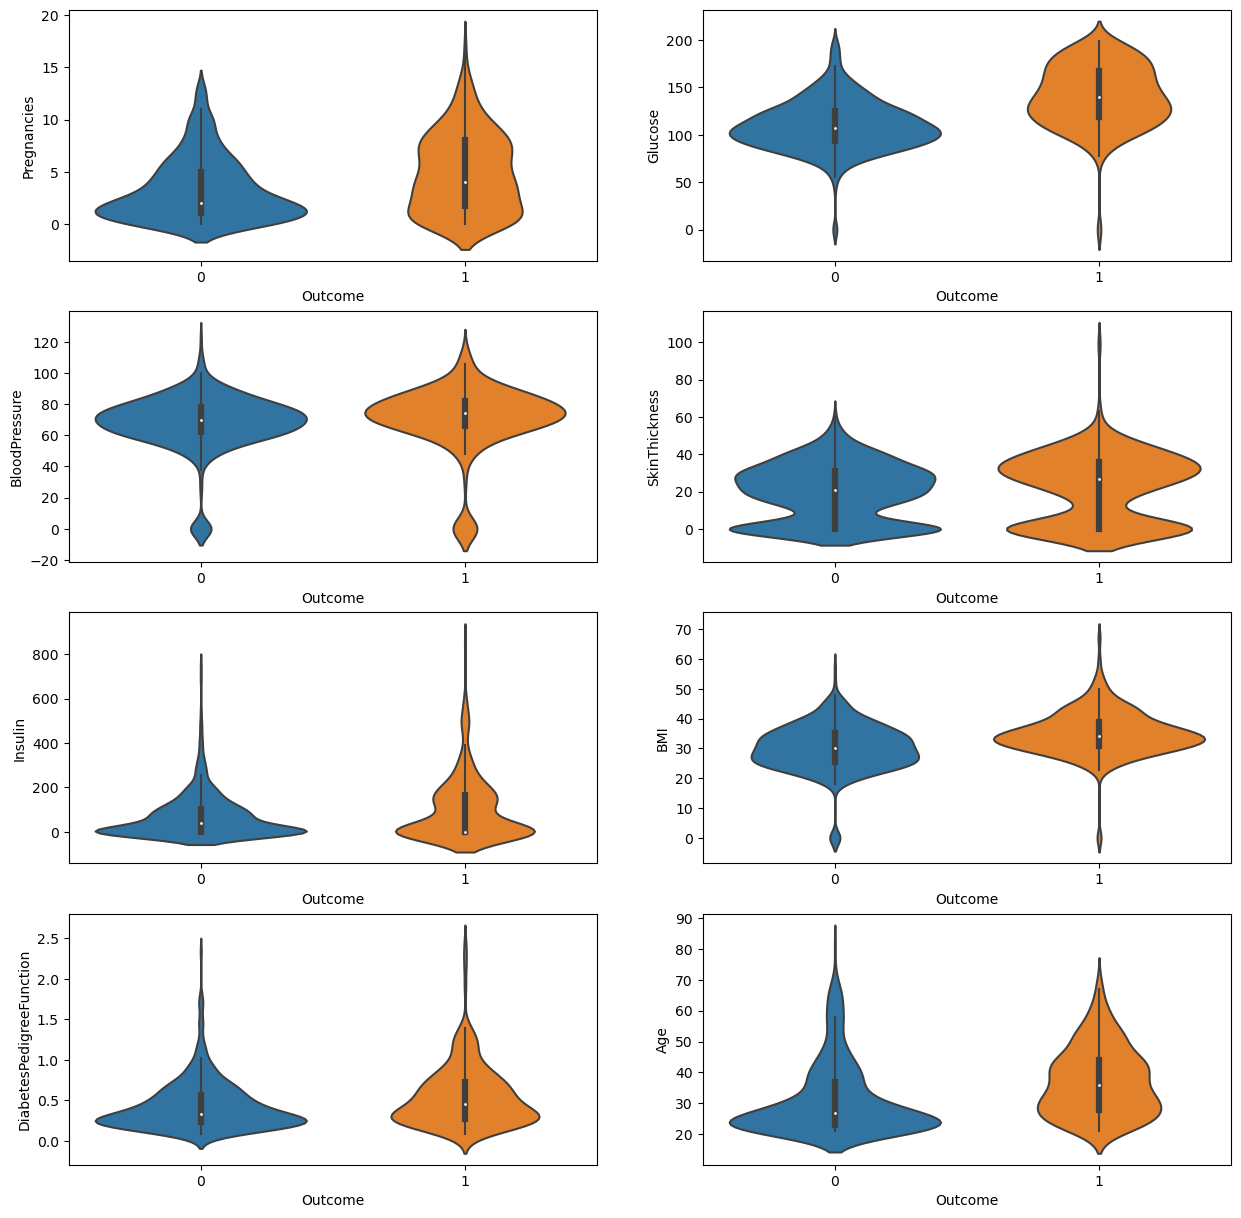

In [123]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for i, col_name in enumerate(cols[:-1]):
    row = i//2
    col = i%2
    print(i, col_name, row)
    sns.violinplot(data=df,x="Outcome", y=col_name, ax=axes[row][col])

/Users/kimyeonjin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


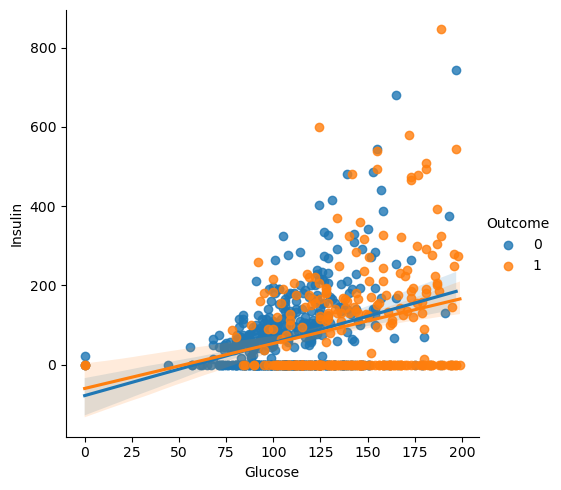

In [125]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

/Users/kimyeonjin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


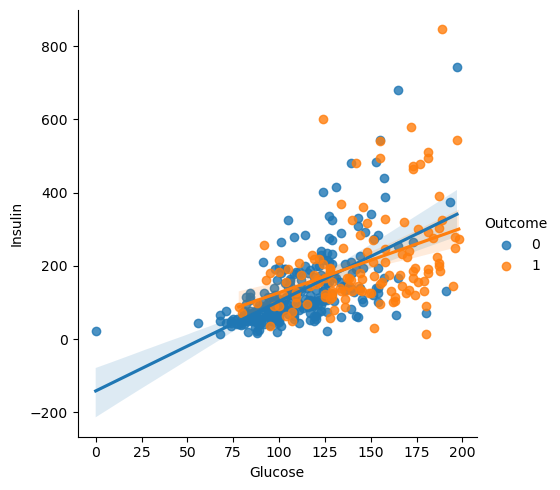

In [126]:
sns.lmplot(data=df[df["Insulin"]>0], x="Glucose", y="Insulin", hue="Outcome")

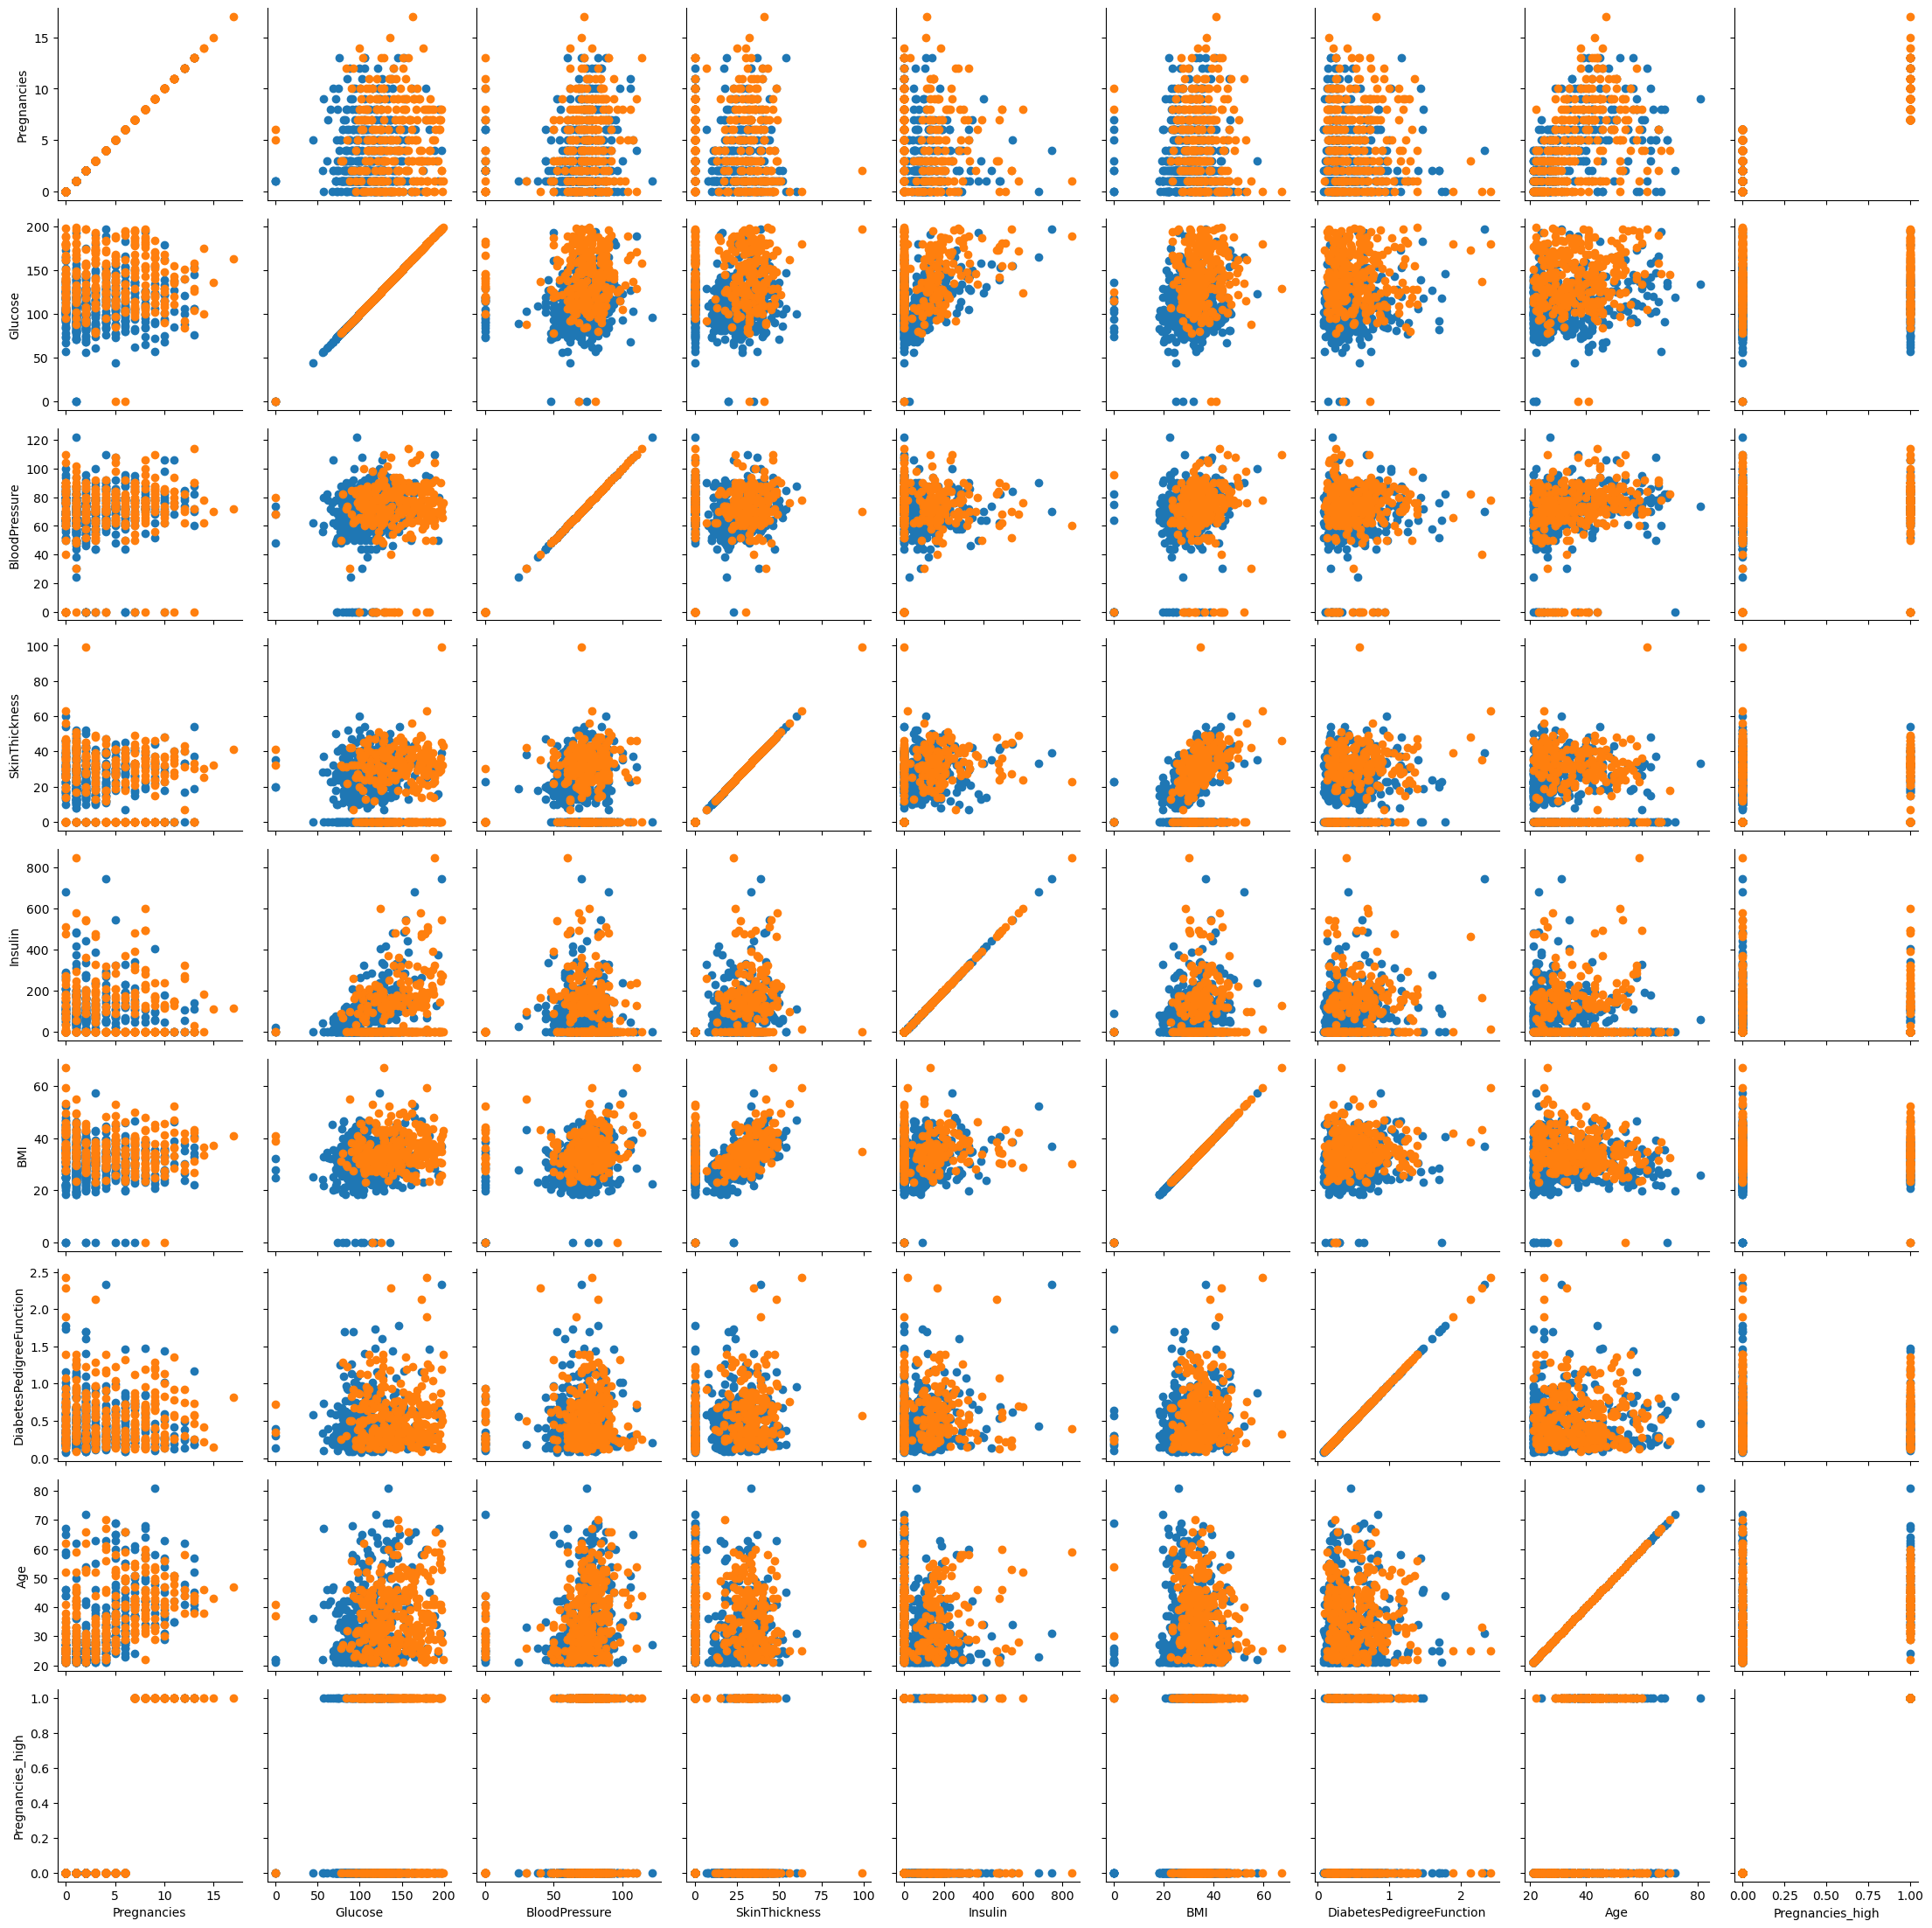

In [129]:
g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

## 상관분석
#### r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
#### r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
#### r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
#### r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는선형관계,
#### r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
#### r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
#### r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [142]:
df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix["Outcome"]=df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [143]:
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<Axes: >

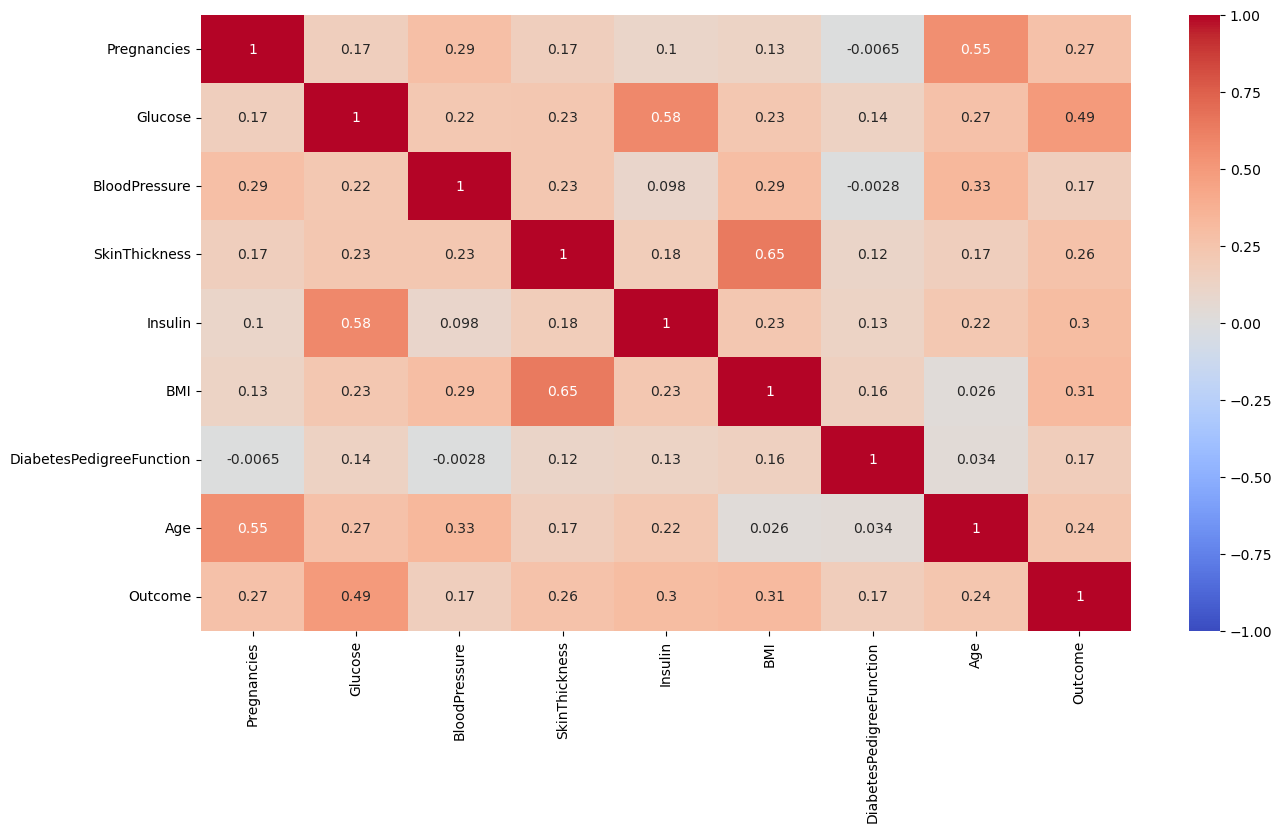

In [144]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [145]:
#Outcome 수치에 대한 상관계수만 모아보기
df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<Axes: xlabel='Insulin', ylabel='Glucose'>

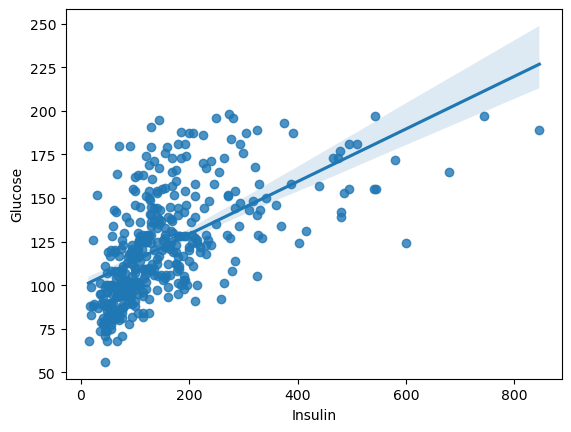

In [146]:
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

<Axes: xlabel='Age', ylabel='Pregnancies'>

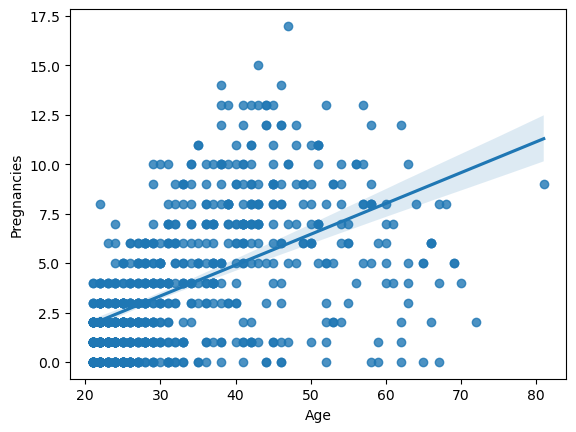

In [147]:
sns.regplot(data=df, x="Age", y="Pregnancies")

/Users/kimyeonjin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


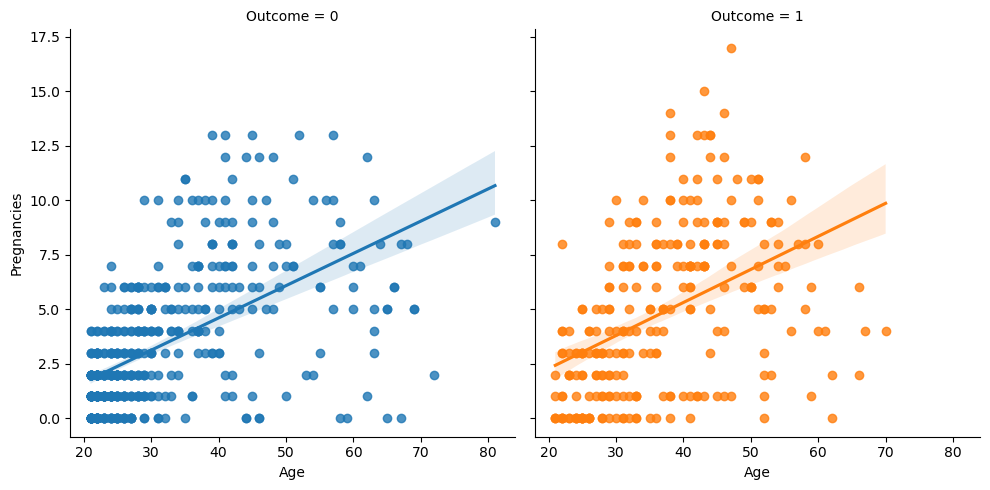

In [149]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")